# KNN Algorithm

## 1. KNN Classifier

In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline


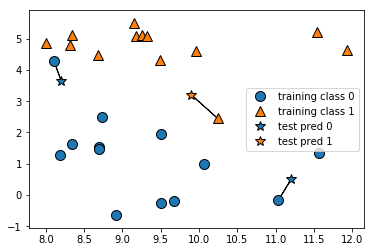

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

### Data Split

In [3]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0) #3:1 split

### Learning

In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [6]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In KNN, Storing training dataset is  all thing for constructin model

### Predict

In [7]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

### Evaluation

In [8]:
clf.score(X_test,y_test)

0.8571428571428571

### Decision Boundary Visualization

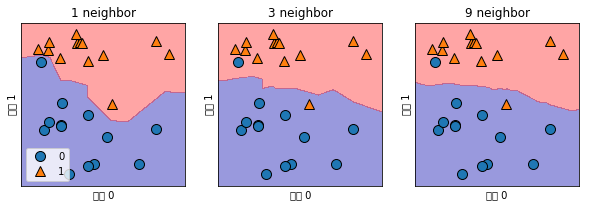

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (10,3))
for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

### Overfitting? UnderFitting?

Using Breast Cancer,,

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target, random_state=66)

In [11]:
training_accuracy=[]
test_accuracy=[]

neighbors_settings = range(1,11)

In [12]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

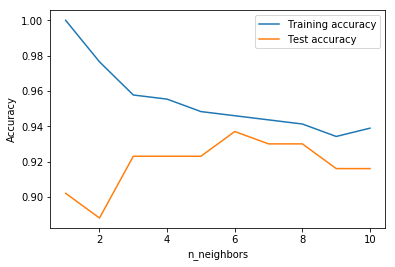

In [13]:
plt.plot(neighbors_settings, training_accuracy, label = 'Training accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'Test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()